In [1]:
import argparse
import sys

import numpy as np
import pykep as pk

from space_navigator.api import MAX_FUEL_CONSUMPTION
from space_navigator.api import Environment
from space_navigator.models.ES import EvolutionStrategies
from space_navigator.utils import read_environment

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
SIMULATION_STEP = 0.0001
ACTION_SIZE = 4

In [3]:
iterations = 3
population_size = 10
n_actions = 1
learning_rate, decay, sigma_coef  = 0.1, 0.99, 0.5

step = SIMULATION_STEP
table_path = "ES_tmp_action_table.csv"

In [4]:
print_out = False
show_progress = True

In [5]:
# path to environment
env_path = "/home/dsdubov/satellite/satellite-collision-avoidance/data/environments/collision.env"
env = read_environment(env_path)

In [6]:
weights_shape = (n_actions, ACTION_SIZE)
sigma_table = np.full(weights_shape, sigma_coef)
sigma_table[:, -1] = step

In [7]:
es = EvolutionStrategies(env, step, weights_shape,
    population_size=population_size, sigma=sigma_table, learning_rate=learning_rate, decay=decay)

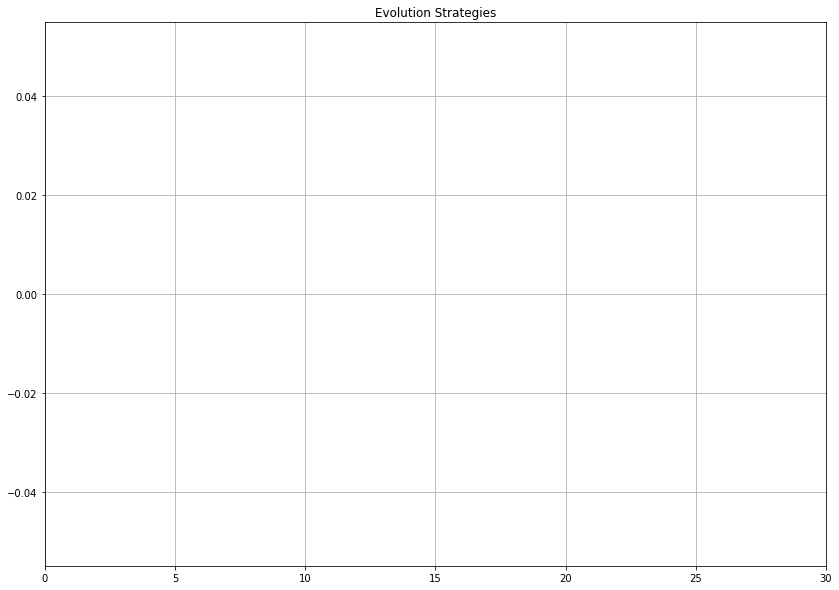

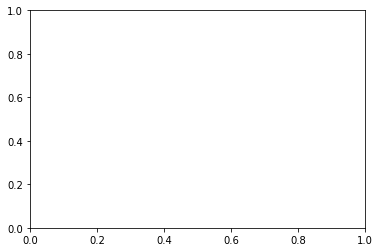

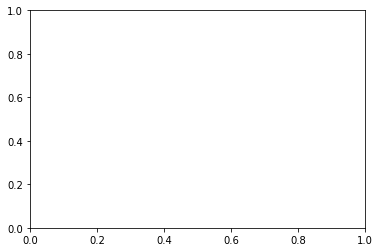

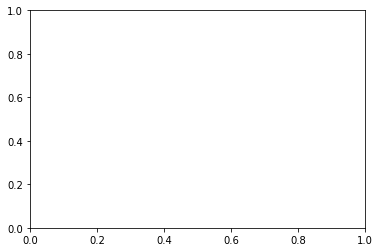

array([[ 8.13239800e-02, -6.21623664e-03,  6.62881610e-02,
         1.15860104e+01]])

In [8]:
es.train(iterations, print_out=print_out, show_progress=show_progress)